<h1> Lab 3 - Supervised learning - Lab report

**Specialization :** Networks and Telecommunications Engineering , 4th Grade

**Academic year :** 2023 - 2024

**Students:** Achour Oussama - Cherni Anas - Hammouda Anis

#K-plus proche voisin (KNN)

In [ ]:
from sklearn.datasets import *
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

digit = load_digits()
dig = pd.DataFrame(digit['data'][0:1700])
print(dig.head())
print(digit.keys())


    0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


Displaying a number

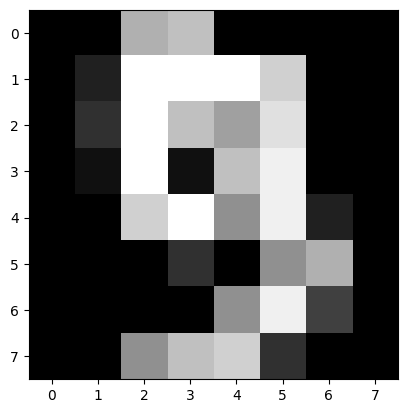

In [ ]:
import matplotlib.pyplot as plt


image = digit['images'][9]
plt.imshow(image, cmap='gray')

Splitting data : Training data and Testing data

In [ ]:
from sklearn.model_selection import train_test_split

train_x = digit.data  # les variables d'entrée
train_y = digit.target  # les étiquettes (variable de sortie)

# Découpage du jeu de données en Training Set et Testing Set
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.25, random_state=42)


Taining the K-NN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialisation de KNeighborsClassifier avec 7 voisins
KNN = KNeighborsClassifier(n_neighbors=7)  # Spécification de l'utilisation de 7 voisins
KNN.fit(x_train, y_train)  # Entraînement du classifieur avec les données d'entraînement


KNeighborsClassifier(n_neighbors=7)

Measuring the model's performance

In [ ]:

print(KNN.score(x_test, y_test))

0.9933333333333333


Modifying k

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialisation de KNeighborsClassifier avec 7 voisins
for k in range(100):
  KNN = KNeighborsClassifier(n_neighbors=k+1)  # Spécification de l'utilisation de 7 voisins
  KNN.fit(x_train, y_train)
  print("k: {} , KNN score : {}".format(k+1,KNN.score(x_test, y_test)))

k: 1 , KNN score : 0.9822222222222222
k: 2 , KNN score : 0.9844444444444445
k: 3 , KNN score : 0.9866666666666667
k: 4 , KNN score : 0.9866666666666667
k: 5 , KNN score : 0.9933333333333333
k: 6 , KNN score : 0.9955555555555555
k: 7 , KNN score : 0.9933333333333333
k: 8 , KNN score : 0.9888888888888889
k: 9 , KNN score : 0.9866666666666667
k: 10 , KNN score : 0.9866666666666667
k: 11 , KNN score : 0.98
k: 12 , KNN score : 0.98
k: 13 , KNN score : 0.98
k: 14 , KNN score : 0.9822222222222222
k: 15 , KNN score : 0.98
k: 16 , KNN score : 0.9777777777777777
k: 17 , KNN score : 0.98
k: 18 , KNN score : 0.9777777777777777
k: 19 , KNN score : 0.9777777777777777
k: 20 , KNN score : 0.9777777777777777
k: 21 , KNN score : 0.9777777777777777
k: 22 , KNN score : 0.98
k: 23 , KNN score : 0.9777777777777777
k: 24 , KNN score : 0.9755555555555555
k: 25 , KNN score : 0.9733333333333334
k: 26 , KNN score : 0.9733333333333334
k: 27 , KNN score : 0.9711111111111111
k: 28 , KNN score : 0.9711111111111111
k

By making K bigger, the model's perforamance has decreased (overfitting)

#Linear Regression (Profit Prediction)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Chargement des données depuis un fichier CSV
df = pd.read_csv("https://raw.githubusercontent.com/AchourOussama/Machine-learning/main/Lab3/univariateLinearRegression.csv")
print(len(df))

# Séparation des données en variables X (population) et Y (profit)
X = df.iloc[:, 0]  # Sélection de la première colonne (population)
Y = df.iloc[:, 1]  # Sélection de la deuxième colonne (profit)


96


Visualizing data

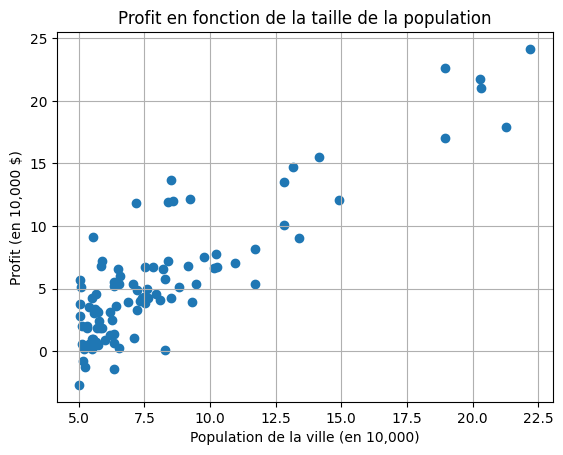

In [2]:

axes = plt.axes()
axes.grid()  # Dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X, Y)  # X et Y sont les variables qu'on a extraites précédemment
plt.title("Profit en fonction de la taille de la population")
plt.xlabel("Population de la ville (en 10,000)")
plt.ylabel("Profit (en 10,000 $)")
plt.show()


Application de la régression linéaire univariée avec scipy.stats



In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

Defying the prediction function F(x) = ax + b


In [ ]:
def F(x):
    return slope * x + intercept
# Création de la ligne de prédiction à partir des valeurs X
fitLine = F(X)

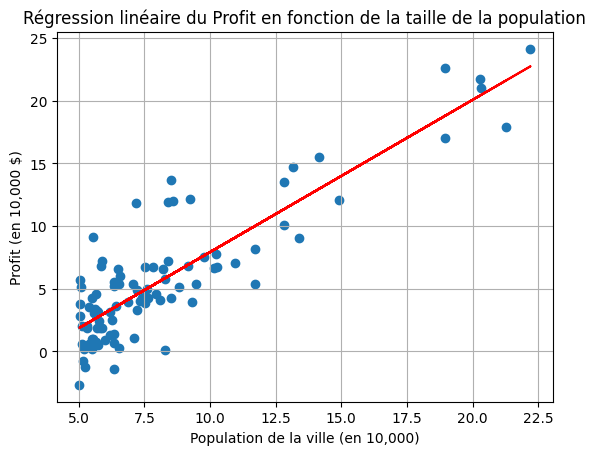

In [ ]:
# Affichage des données et de la ligne de régression
plt.scatter(X, Y)
plt.plot(X, fitLine, c='r')  # La ligne de régression en rouge
plt.title("Régression linéaire du Profit en fonction de la taille de la population")
plt.xlabel("Population de la ville (en 10,000)")
plt.ylabel("Profit (en 10,000 $)")
plt.grid(True)
plt.show()

making prediction


In [ ]:
predicted_profit = F(20.27)
print(f"Le profit prédit pour une population de taille 20.27 (en 10,000) est de : {predicted_profit} $")


Le profit prédit pour une population de taille 20.27 (en 10,000) est de : 20.404955431194587 $


# Multivariate Regression (Price Prediction).

importing data

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# importing data
df = pd.read_excel("MultivariateLinearRegression.xlsx")

# printing the first 5 heads
print("Data columns: first 5 heads")
print(df.head())

Data columns: first 5 heads
   taille_en_pieds_carre  nb_chambres    prix
0                   2104            3  399900
1                   1600            3  329900
2                   2400            3  369000
3                   1416            2  232000
4                   3000            4  539900


extracting prices : target variables and predictable variables

In [ ]:
Y = df['prix']
X = df[['taille_en_pieds_carre', 'nb_chambres']]

Visualizing data


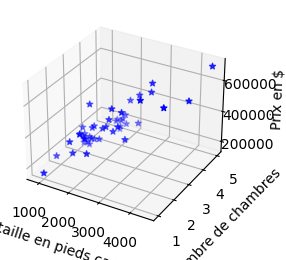

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.scatter(df['taille_en_pieds_carre'], df['nb_chambres'], df['prix'], c='b', marker='*')

ax.set_xlabel('taille en pieds carrés')
ax.set_ylabel('Nombre de chambres')
ax.set_zlabel('Prix en $')

plt.show()

Applying the algorithm

In [ ]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X = df[['taille_en_pieds_carre', 'nb_chambres']]
scale.fit(X)
X_scaled = scale.transform(X)
print(X_scaled)
X=sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

[[ 1.31415422e-01 -2.26093368e-01]
 [-5.09640698e-01 -2.26093368e-01]
 [ 5.07908699e-01 -2.26093368e-01]
 [-7.43677059e-01 -1.55439190e+00]
 [ 1.27107075e+00  1.10220517e+00]
 [-1.99450507e-02  1.10220517e+00]
 [-5.93588523e-01 -2.26093368e-01]
 [-7.29685755e-01 -2.26093368e-01]
 [-7.89466782e-01 -2.26093368e-01]
 [-6.44465993e-01 -2.26093368e-01]
 [-7.71822042e-02  1.10220517e+00]
 [-8.65999486e-04 -2.26093368e-01]
 [-1.40779041e-01 -2.26093368e-01]
 [ 3.15099326e+00  2.43050370e+00]
 [-9.31923697e-01 -2.26093368e-01]
 [ 3.80715024e-01  1.10220517e+00]
 [-8.65782986e-01 -1.55439190e+00]
 [-9.72625673e-01 -2.26093368e-01]
 [ 7.73743478e-01  1.10220517e+00]
 [ 1.31050078e+00  1.10220517e+00]
 [-2.97227261e-01 -2.26093368e-01]
 [-1.43322915e-01 -1.55439190e+00]
 [-5.04552951e-01 -2.26093368e-01]
 [-4.91995958e-02  1.10220517e+00]
 [ 2.40309445e+00 -2.26093368e-01]
 [-1.14560907e+00 -2.26093368e-01]
 [-6.90255715e-01 -2.26093368e-01]
 [ 6.68172729e-01 -2.26093368e-01]
 [ 2.53521350e-01 -2

prediction function

In [ ]:
epsilon= 8.96e+04
alpha=139.2107
beta=-8738.0191

def predict_price_of_house(taille_maison, nb_chambre):
    return epsilon + alpha * taille_maison + beta * nb_chambre

print(predict_price_of_house(4500, 5))

672358.0545000001


# Logistic regression

importing the iris data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
#loading the iris data base
iris = datasets.load_iris()

Choosing features and adjusting labels

In [ ]:
# Choosing the first 2 features
X = iris.data[:, :2]
# Adjusting the labels : label {0} => 0 , labels {1,2} => 1
print("With 3 labels ")
print(iris.target)
print("With 2 labels")
y = (iris.target!=0)*1
print(y)

With 3 labels 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
With 2 labels
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


Visualizing data

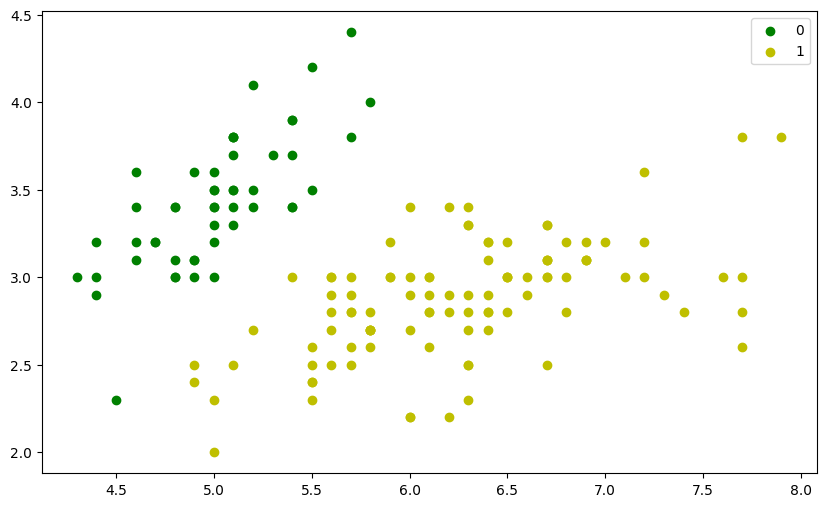

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[y==0][:,0],X[y==0][:,1],color='g',label='0')
plt.scatter(X[y==1][:,0],X[y==1][:,1],color='y',label='1')
plt.legend();

Creaitng the logisitc regression model

In [ ]:
model = LogisticRegression(C=1e20)
model.fit(X, y)

LogisticRegression(C=1e+20)

Providing Test Data and evaluating the model

[0 1 0 1 1]


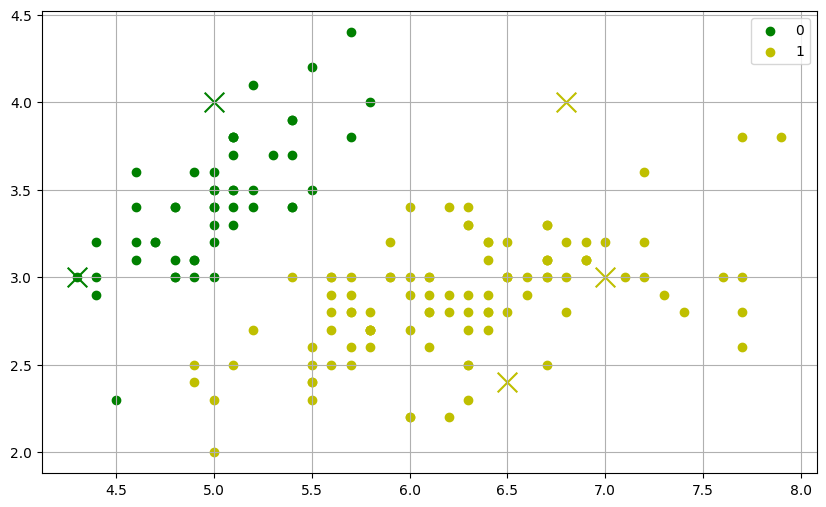

In [ ]:
# Test data
Iries_To_Predict = [[4.3,3.0], [6.5,2.4], [5.0,4.0], [7.0,3.0] , [6.8,4.0]]

# Evaluating the model
predictions = model.predict(Iries_To_Predict)
print(predictions)

# Visuatlizing data
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='y', label='1')
plt.grid()
for point, prediction in zip(Iries_To_Predict, predictions):
    if prediction == 0:
        plt.scatter(point[0], point[1], color='g', marker='x', s=200)
    else:
        plt.scatter(point[0], point[1], color='y', marker='x', s=200)
plt.legend()
plt.show()

#Simple Neural Network

Prediction for example_1 : [[0.99992707]]
Prediction for example_2 : [[0.99992707]]


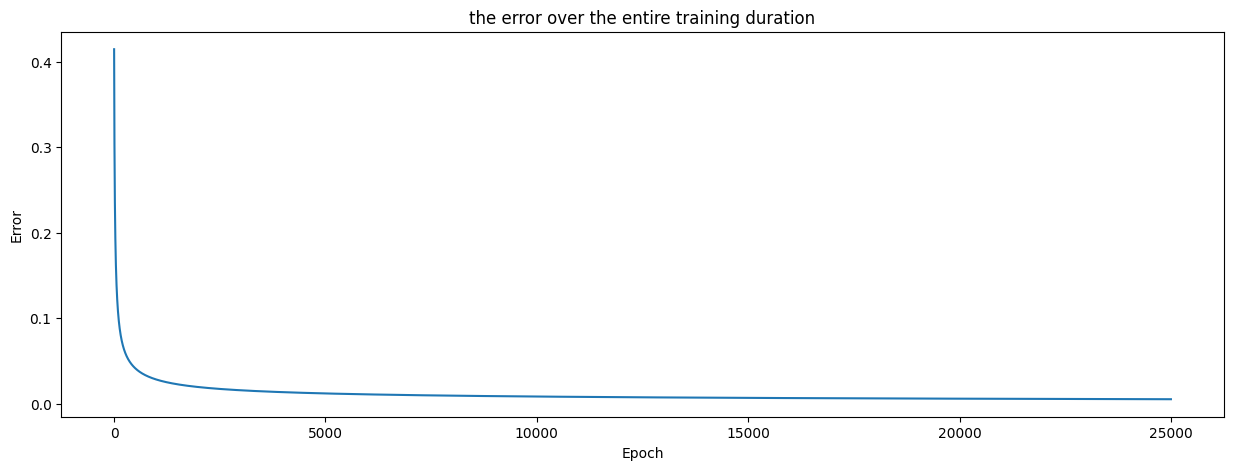

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# input data : values of attributes (Smoking , Obesity , Exercise)
inputs = np.array([[0, 1, 0],
                   [0, 0, 1],
                   [1, 0, 0],
                   [1, 1, 0],
                   [1, 1, 1]])

# output data : Diabetic(1) or no (0)
outputs = np.array([[1], [0], [0], [1], [1]])

# create NeuralNetwork class
class NeuralNetwork:
    # initilize an object when instantiating the NeuralNetwork class
    def __init__(self, inputs, outputs):
        # intialize class variables(inputs , outputs and weights)
        self.inputs  = inputs
        self.outputs = outputs
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network : to calculate the output of the model
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    # train the neural net for 25,000 iterations
    def train(self, epochs=25000):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

# create neural network
NN = NeuralNetwork(inputs, outputs)
# train neural network
NN.train()

# create two new examples to predict
example_1 = np.array([[1, 1, 0]])
example_2 = np.array([[0, 1, 1]])

# print the predictions for both examples
print("Prediction for example_1 :", NN.predict(example_1))
print("Prediction for example_2 :", NN.predict(example_2))

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('the error over the entire training duration')
plt.show()

**Importation of libraries:**
* numpy for numerical computation
* matplotlib.pyplot for creating graphs

**Input and output data:**  
* A numpy array for input (attributes)
* A numpy array for output (whether the person is diabetic or not) .

**NeuralNetwork class:**

A class representing the neural network. It includes all the functions necessary to create, train, and make predictions with the network.

* init function:

  initializes an object when being created , by encapsulating the inputs , outputs and weights data

* Sigmoid activation function:

  Used to activate neurons in the network, with the ability to calculate its derivative for backpropagation.
* Feedforward:

  calculates the network's output based on current inputs and weights, by applying the sigmoid function .

* Backpropagation:

  Adjusts the network's weights based on the error between the predicted output and the expected output.

* Training:
  
  Repeats feedforward and backpropagation for a defined number of epochs in order to update weights and minimize errors .

* Prediction:

  Function to predict the network's output for new data

# Multi-Layer Neural Network 6 - Compte Rendu

Importing libraries

In [ ]:
from mlxtend.data import mnist_data
from mlxtend.preprocessing import shuffle_arrays_unison
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.preprocessing import standardize
from mlxtend.classifier import MultiLayerPerceptron as MLP


Splitting data

In [ ]:

X, Y = mnist_data()
X, Y = shuffle_arrays_unison((X, Y), random_seed=1)
X_train, Y_train = X[:5000], Y[:5000]
X_test, Y_test = X[4500:], Y[4500:]
# X_train.shape, Y_train.shape
# X_test.shape, Y_test.shape

In [ ]:
X_train.shape, Y_train.shape
# X_test.shape, Y_test.shape

((5000, 784), (5000,))

Plot_digit method

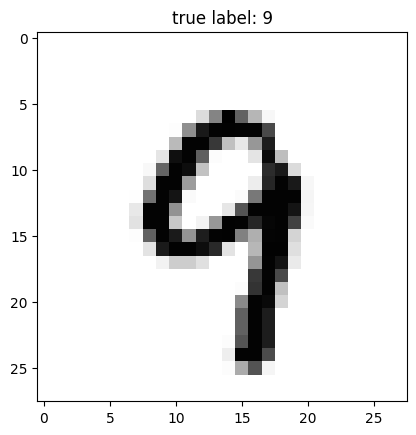

In [ ]:
def plot_digit(X, y, idx):

  img = X[idx].reshape(28,28)
  plt.imshow(img, cmap='Greys', interpolation='nearest')
  plt.title('true label: %d' % y[idx])
  plt.show()

plot_digit(X, Y,3500)

Standardizing pixel values

In [ ]:
X_train_std, params = standardize(X_train, return_params=True)
X_test_std = standardize(X_test, params=params)

Initializing the neural network

In [ ]:
def NeuralNetworkModel(input_size, output_size, hidden_layers, eta, epochs, minibatches, random_seed=None):
    nn = MLP(
        l1=input_size,
        l2=output_size,
        hidden_layers=hidden_layers,
        epochs=epochs,
        eta=eta,
        minibatches=minibatches,
        random_seed=random_seed
    )
    return nn

Training the neural network

In [ ]:
input_size = 784
output_size = 10
hidden_layers = [32]
eta = 0.001
epochs = 50
minibatches = 32
nn = NeuralNetworkModel(input_size, output_size, hidden_layers, eta, epochs, minibatches, random_seed=42)
nn = nn.fit(X_train_std, Y_train)

Calculating accuracy

In [ ]:
training_accuracy = nn.score(X_train_std, Y_train)
testing_accuracy = nn.score(X_test_std, Y_test)
print("Training accuracy:", training_accuracy)
print("Testing accuracy:", testing_accuracy)

Training accuracy: 0.8562
Testing accuracy: 0.848


Plotting

Text(0, 0.5, 'Cost')

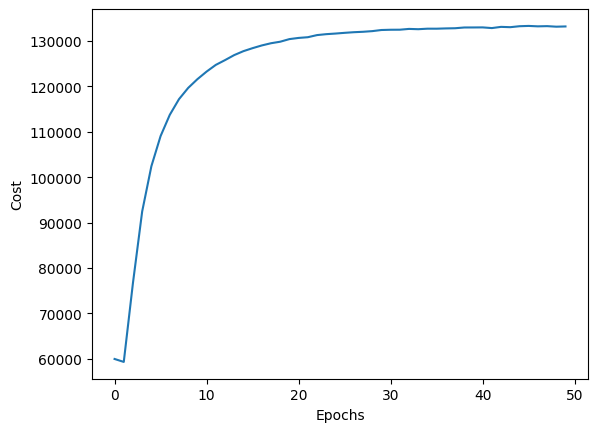

In [ ]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.xlabel('Epochs')
plt.ylabel('Cost')

Prediction (optional)

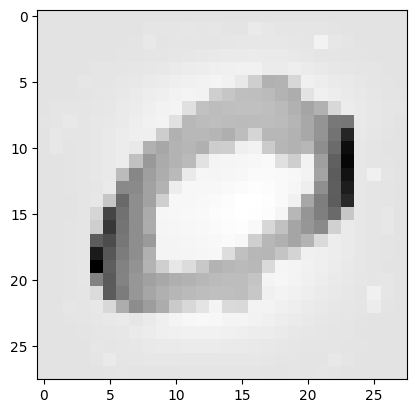

In [ ]:
image = X_test_std[499]
image = image.reshape(28, 28)

plt.imshow(image, cmap='Greys')
plt.show()

In [ ]:
image = image.reshape(1, 28, 28, 1)
image = image.reshape(1, 784)
prediction = nn.predict(image)
print(prediction)

[0]


**Code explanation**:

This code includes the following sections:


*   Importing data:  

  This data is the  MNIST dataset consists of 28x28 pixel grayscale images of handwritten  digits (0 through 9).  Such dataset is commonly used for the purpose of training machine learning models for image recognition tasks .
  The plot_digit method takes an element of the dateset (which is a list of pixels) and displays an image with its corresponding label


*   Building the neural network model:

  This model is an implementation of  Multi-layer Perceptron (MLP)
  The MLP() custructor takes the necessary carecteristics of this model . e.g. Inout size , output size , hidden_layer size,epochs , learning rate (eta),minibatches and random_seed


*   Training and testing the model:
The model is trained on the standardized training data
A plot shows us the cost function according to epochs
*   Prediction:

  The model is given an input and predicts the digit class of the image





**Manipulating model's parameters**:

<h3>Epochs

In [ ]:
input_size = 784
output_size = 10
hidden_layers = [50]
eta = 0.01
minibatches = 32
# generating a range of epochs
epochs = range(1, 100, 20)
training_accuracies = []
test_accuracies = []
for epoch in epochs :
    nn = NeuralNetworkModel(input_size, output_size, hidden_layers, eta, epoch, minibatches, random_seed=42)
    nn = nn.fit(X_train_std, Y_train)
    training_accuracies.append(nn.score(X_train_std, Y_train))
    test_accuracies.append(nn.score(X_test_std, Y_test))

Visualizing accuracy evolution according to the epochs

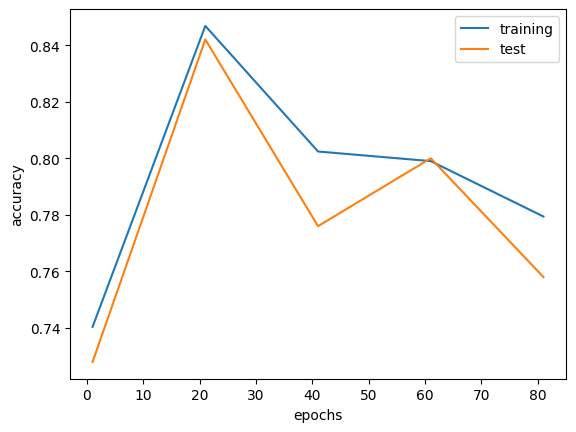

In [ ]:
plt.plot(epochs, training_accuracies, label='training')
plt.plot(epochs, test_accuracies, label='test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**Observations:**


---



*   Too Few Epochs:

  For small number of epochs, the model may not converge to a good solution.
  --> low training and validation accuracies
  --> underfitting.

*   Appropriate Number of Epochs:
  For appropriate number of epochs,the model properly converge
  --> training and validation accuracies increase
  --> The learning curves stabilize, and the model generalizes well to unseen data.

*   Too Many Epochs:

  For too large number of epochs,the model overfit the training data.
  --> The training accuracy may continue to improve, however,the validation accuracy may plateau or decrease, indicating poor generalization.




<h3>Etas

In [ ]:
input_size = 784
output_size = 10
hidden_layers = [32]
epochs = 50
minibatches = 32
# manipulate the learning rate
etas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]
training_accuracies = []
test_accuracies = []
for eta in etas :
    nn = NeuralNetworkModel(input_size, output_size, hidden_layers, eta, epochs, minibatches, random_seed=42)
    nn = nn.fit(X_train_std, Y_train)
    training_accuracies.append(nn.score(X_train_std, Y_train))
    test_accuracies.append(nn.score(X_test_std, Y_test))

Visualizing accuracy evolution according to the learing rate

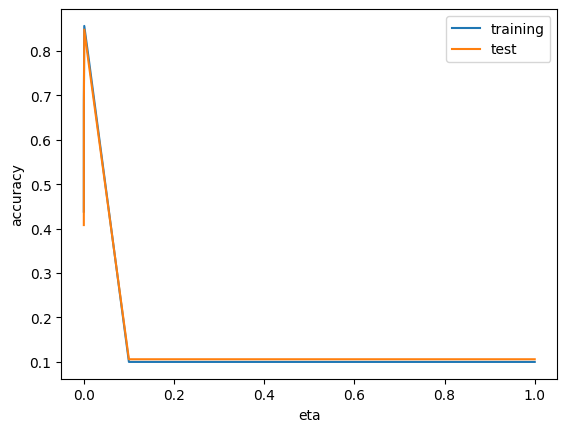

In [ ]:
plt.plot(etas, training_accuracies, label="training")
plt.plot(etas, test_accuracies, label="test")
plt.xlabel('eta')
plt.ylabel('accuracy')
plt.legend()

plt.show()

**Observations:**

---
*  Low Learning Rate:
  For a small learning rate , the model converges very slowly

  --> Training takes a long time, and the model might struggle to escape local minima.

*  Optimal Learning Rate:

  For an optimal learning rate the model converges efficiently without reaching the minimum.
  
*  High Learning Rate:

  For a high learning rate the model reaches the minimum
  --> poor convergence and may even prevent the model from learning effectively.

<h3> Neurons

In [ ]:
input_size = 784
output_size = 10
eta = 0.001
epochs = 50
minibatches = 32
# manipulating the number of neurons in the hidden_layer
hidden_layers = [[2**n] for n in range(1, 10)]
training_accuracies = []
test_accuracies = []

for hidden_layer in hidden_layers :
    nn = NeuralNetworkModel(input_size, output_size, hidden_layer, eta, epochs, minibatches, random_seed=42)
    nn = nn.fit(X_train_std, Y_train)
    training_accuracies.append(nn.score(X_train_std, Y_train))
    test_accuracies.append(nn.score(X_test_std, Y_test))

Visualizing accuracy evolution according to the learing rate

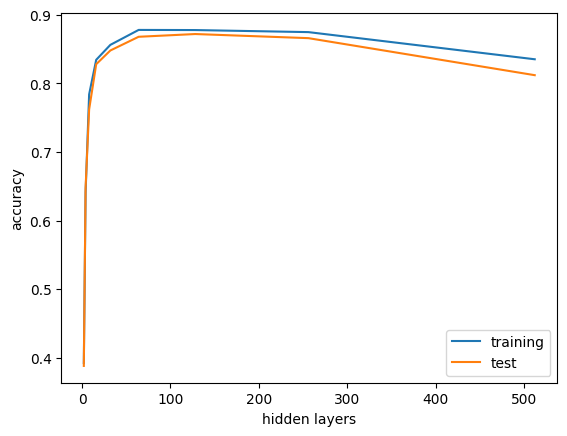

In [ ]:
plt.plot(hidden_layers, training_accuracies, label="training")
plt.plot(hidden_layers, test_accuracies, label="test")
plt.xlabel('hidden layers')
plt.ylabel('accuracy')
plt.legend()

plt.show()

**Observations:**

---
*  Too Few Neurons:
  For too few number of neurons, the model don't capture the complexity of the underlying patterns in the data.

  --> underfitting, and the model may struggle to learn from the training data.

*  Optimal Number of Neurons:
  For a, optimal number of neurons,the model learns and generalizes well.
   
  --> It captures the necessary features without complexity.

*  Too Many Neurons:

  For a large number of neurons the model falls into overfitting
  --> the model memorizes the training data but fails to generalize to new, unseen data.

  -->The training accuracy may be high, but the validation accuracy may suffer.

**Applying another model**:

Since we used the MLP model , we continue working on Neural Networks models
As an example , we will choose the Convolutional Neural Networks (CNN) model

Importing data

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loading MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Preprocessing the data

In [ ]:
#X_train.shape[0] is used to access the first dimension (number of samples)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Converting labels to one-hot encoding : converting interger labels into a binary matrix
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

Building the CNN model

In [ ]:
# Splitting the data for training and validation
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Building the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


Training the model

In [ ]:
history= model.fit(X_train, Y_train, epochs=11, batch_size=64, validation_data=(X_val, Y_val))

Epoch 1/11
750/750 [==============================] - 48s 62ms/step - loss: 0.2082 - accuracy: 0.9370 - val_loss: 0.0610 - val_accuracy: 0.9813
Epoch 2/11
750/750 [==============================] - 46s 62ms/step - loss: 0.0574 - accuracy: 0.9822 - val_loss: 0.0493 - val_accuracy: 0.9843
Epoch 3/11
750/750 [==============================] - 49s 65ms/step - loss: 0.0392 - accuracy: 0.9878 - val_loss: 0.0459 - val_accuracy: 0.9857
Epoch 4/11
750/750 [==============================] - 45s 61ms/step - loss: 0.0313 - accuracy: 0.9896 - val_loss: 0.0381 - val_accuracy: 0.9893
Epoch 5/11
750/750 [==============================] - 43s 58ms/step - loss: 0.0240 - accuracy: 0.9926 - val_loss: 0.0390 - val_accuracy: 0.9887
Epoch 6/11
750/750 [==============================] - 46s 61ms/step - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.0394 - val_accuracy: 0.9887
Epoch 7/11
750/750 [==============================] - 47s 63ms/step - loss: 0.0171 - accuracy: 0.9942 - val_loss: 0.0503 - val_accuracy:

Evaluating the model

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 5s 15ms/step - loss: 0.0401 - accuracy: 0.9905
Test Accuracy: 99.05%


Plotting

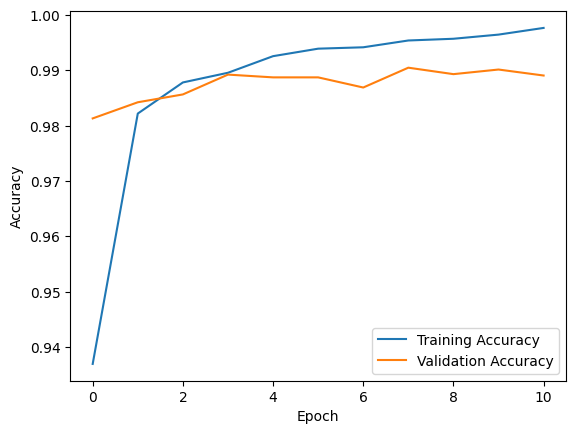

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Comparing MLP and CNN:**

Accuracy

In [ ]:
print("Accuracy of CNN :", np.max(history.history["accuracy"]))
print("Accuracy of MLP :", training_accuracy )

Accuracy of CNN : 0.9976875185966492
Accuracy of MLP : 0.8562


**`Gerenalization:`** the quality of the model of being able to predict whatever data it would be given

In [ ]:
print("CNN ==>", np.max(history.history["val_accuracy"]))
print("MLP ==>", testing_accuracy)

CNN ==> 0.9904999732971191
MLP ==> 0.848


**Overfitting:** the tendacy of the model of being fitted to the training dataset and thus the difficulty to predict new data

In [ ]:
print("CNN")
print("Training accuracy : ", max(history.history["accuracy"]))
print("Testing accuracy : ", max(history.history["val_accuracy"]))
print("Difference : ",np.abs(max(history.history["accuracy"]) - max(history.history["val_accuracy"])))
print("MLP")
print("Training accuracy : ", training_accuracy)
print("Testing accuracy : ", testing_accuracy)
print("DIFFERENCE : ", np.abs(training_accuracy - testing_accuracy))

CNN
Training accuracy :  0.9976875185966492
Testing accuracy :  0.9904999732971191
Difference :  0.007187545299530029
MLP
Training accuracy :  0.8562
Testing accuracy :  0.848
DIFFERENCE :  0.008199999999999985
